## Продвинутая визуализация с Matplotlib

## Практического задание 

### Описание практического задания

Выполнить задачи по визуализации данных — вписать свой код в ячейки после комментария `### YOUR CODE HERE ###` 
При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

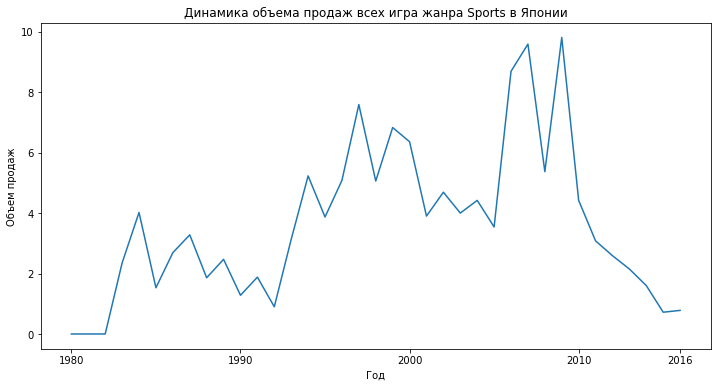

In [17]:
sports = df[df['Genre'] == 'Sports'].groupby('Year').agg({'JP_Sales': 'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (12, 6))
#sports.head()
ax.plot(sports['Year'], sports['JP_Sales'])
ax.set_title('Динамика объема продаж всех игра жанра Sports в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж')
ax.set_xticks(list(range(int(sports['Year'].min()), int(sports['Year'].max()), 10)) + [int(sports['Year'].max())])
plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

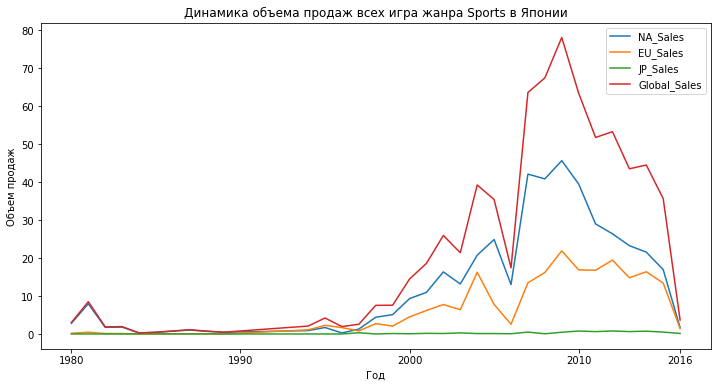

In [45]:
activision = df[df['Publisher'] == 'Activision'][['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].groupby('Year').agg('sum').reset_index()
states = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
#activision.head()
fig, ax = plt.subplots(figsize = (12, 6))
for i_state in states:
    ax.plot(activision['Year'], activision[i_state])
ax.set_title('Динамика объема продаж студии Activision')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж')
ax.set_xticks(list(range(int(sports['Year'].min()), int(sports['Year'].max()), 10)) + [int(sports['Year'].max())])
ax.legend(states)
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

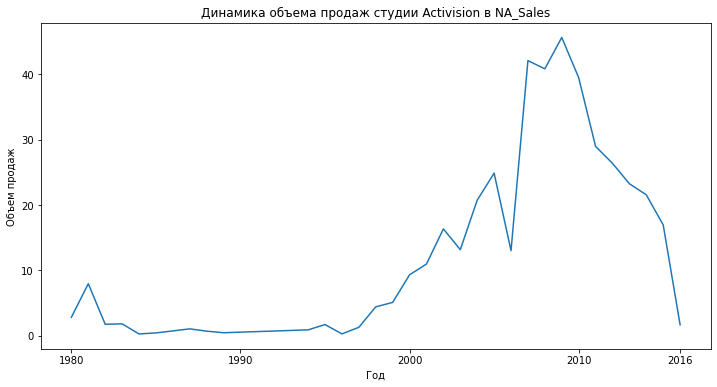

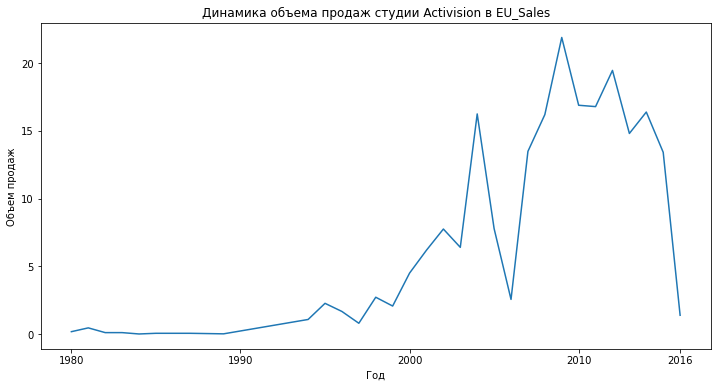

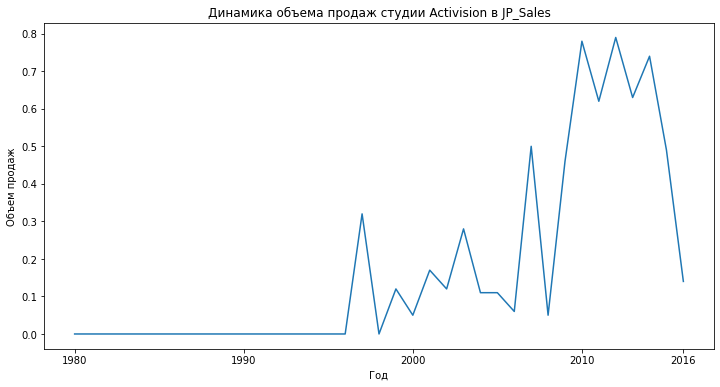

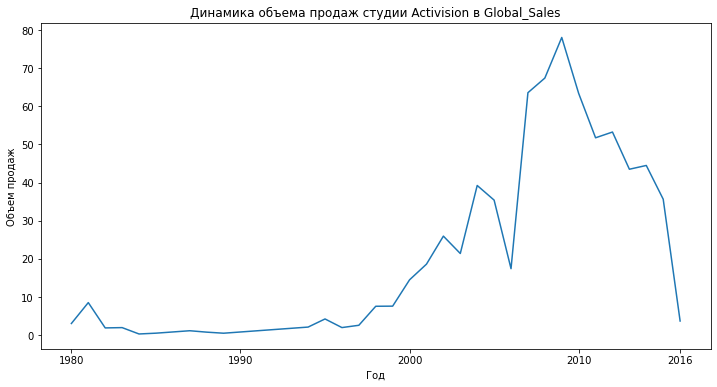

In [47]:
for i_state in states:
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.plot(activision['Year'], activision[i_state])
    ax.set_title('Динамика объема продаж студии Activision в ' + i_state)
    ax.set_xlabel('Год')
    ax.set_ylabel('Объем продаж')
    ax.set_xticks(list(range(int(sports['Year'].min()), int(sports['Year'].max()), 10)) + [int(sports['Year'].max())])
#ax.legend(states)
plt.show()


### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

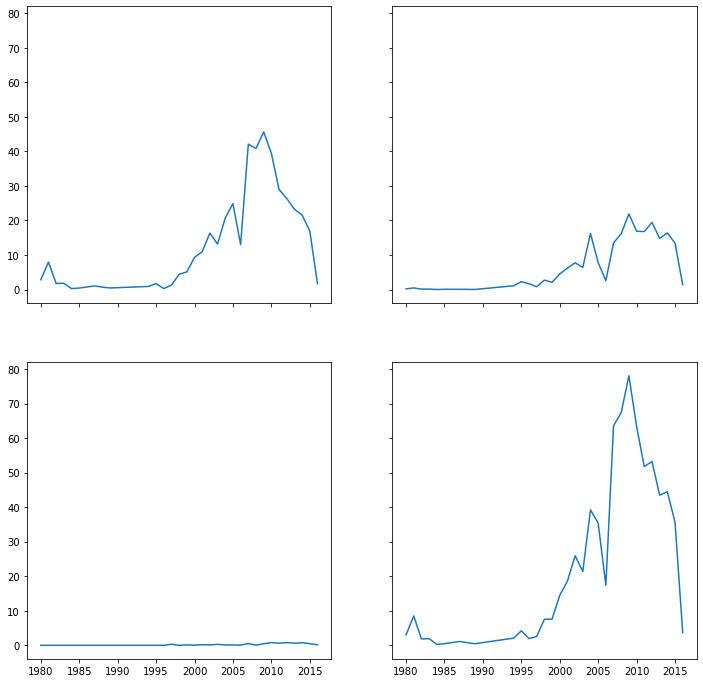

In [77]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12), sharex = True, sharey = True)
states = [['NA_Sales', 'EU_Sales'], ['JP_Sales', 'Global_Sales']]
for i in range(len(states)):
    for j, j_state in enumerate(states[i]):
        axs[i][j].plot(activision['Year'], activision[states[i][j]])
axs.set_xlabel('Год')
axs.set_ylabel('Объем продаж')
axs.set_xticks(list(range(int(sports['Year'].min()), int(sports['Year'].max()), 10)) + [int(sports['Year'].max())])
plt.show()

### выводит ошибку 'numpy.ndarray' object has no attribute 'set_xlabel', почему?

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

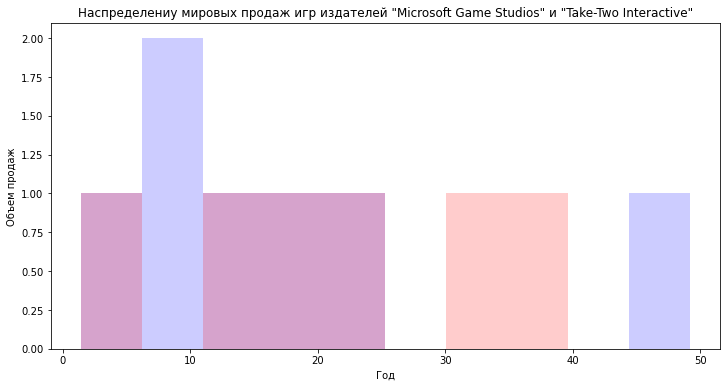

In [100]:
msg = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)].groupby('Year').agg({'Global_Sales' : 'sum'})
#msg.head()
tti = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)].groupby('Year').agg({'Global_Sales' : 'sum'})
#tti.head()

fig, ax = plt.subplots(figsize = (12, 6))
_, bins, _ = ax.hist(msg, alpha = 0.2, color = 'blue')
ax.hist(tti, color = 'red', alpha = 0.2, bins = bins)
ax.set_title('Hаспределениу мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive"')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж')
#ax.set_xticks(list(range(int(sports['Year'].min()), int(sports['Year'].max()), 10)) + [int(sports['Year'].max())])
ax.set_ticks = (bins)

plt.show()

### почему-то красный цвет разный

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

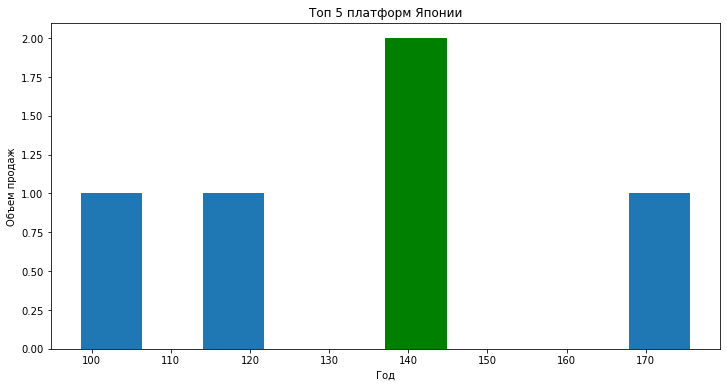

In [122]:
plat = df.loc[ : , ['Platform', 'JP_Sales']].groupby('Platform').agg('sum').sort_values('JP_Sales', ascending = False).head(5)
plat
fig, ax = plt.subplots(figsize = (12, 6))
n, bins, patches = ax.hist(plat)
max_index = np.argmax(n)
patches.patches[max_index].set_color('green')
min_index = np.argmin(n)
patches.patches[min_index].set_color('red')
ax.set_title('Топ 5 платформ Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж')
plt.show()

#не совсем понятно, почему пятого значения нет, и ось икс не по годам(((